In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
a = [2,3,1,2]

from tensorflow.keras.utils import to_categorical

to_categorical(a, num_classes=5)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
carte = "/content/drive/My Drive/carte/Plan compteur sans point de mesure.JPG"

In [ ]:
import cv2

img = cv2.imread(carte)

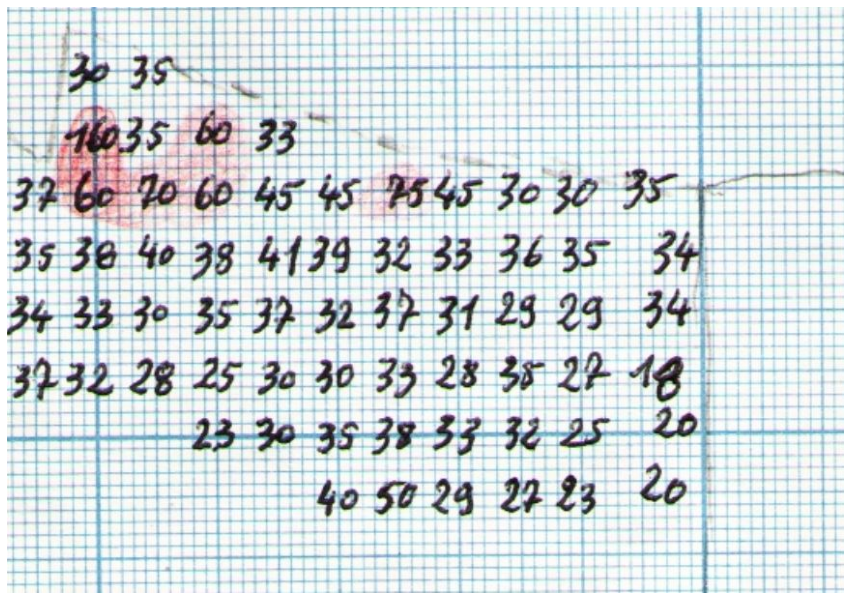

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 30

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import clear_output 
import math
import numpy as np

def minLineLength(x):
    display(x)
    return x

def maxLineGap(y):
    display(y)
    return y

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

def on_button_clicked(event):
    with out:
      clear_output()
      img = cv2.imread(carte)
      result = img.copy()
      inputImageGray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
      edges = cv2.Canny(inputImageGray,75,150)
      #cv2_imshow(edges)
      lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=a.result, maxLineGap=b.result)
      angles = []
      mask = np.zeros(edges.shape, dtype="uint8")
      if lines is not None:
        for i in range(0, len(lines)):
          l = lines[i][0]
          cv2.line(mask, (l[0], l[1]), (l[2], l[3]), (255,255,255), 2, cv2.LINE_AA)
          #calculate angle in radian,  if you need it in degrees just do angle * 180 / PI
          radian = math.atan2(l[1] - l[3], l[0] - l[2])
          angles.append((radian*180)/np.pi)
        cv2.imwrite('lines.jpg', mask)
        i = 0
        if inclinaison.value == "gauche":
          while (i != len(angles) - 1) and (180 >= angles[i]) and (angles[i] > 135):
            i += 1
          angle = angles[i] + 180
          print(angles[i])
          print(i)
          #print(i)
          #mask = np.zeros(edges.shape, dtype="uint8")
          #l_test = lines[i][0]
          #plt.imshow(cv2.line(mask, (l_test[0], l_test[1]), (l_test[2], l_test[3]), (255,255,255), 2, cv2.LINE_AA))
          if i == len(angles) - 1 and angles[i] > 0 and angle is None:
            angle = min(angles) - 180
            #print(min(angles))
          plt.imshow(cv2.cvtColor(rotate_image(mask, angle), cv2.COLOR_BGR2RGB))
          plt.axis('off')
          plt.show()
          cv2.imwrite('carte.jpg', rotate_image(img,angle))
        if inclinaison.value == "droite":
          #print(angles)
          while (i != len(angles) - 1 and angles[i] < 135):
            i += 1
          angle = angles[i] - 180
          print(angles[i])
          #print(i)
          #mask = np.zeros(edges.shape, dtype="uint8")
          #l_test = lines[i][0]
          #plt.imshow(cv2.line(mask, (l_test[0], l_test[1]), (l_test[2], l_test[3]), (255,255,255), 2, cv2.LINE_AA))
          if i == len(angles) - 1 and angles[i] < 0 and angle is None:
            angle = min(angles) + 180
            #print(min(angles))
          plt.imshow(cv2.cvtColor(rotate_image(img, angle), cv2.COLOR_BGR2RGB))
          plt.axis('off')
          plt.show()
          cv2.imwrite('carte.jpg', rotate_image(img,angle))
      else:
        print("fail")
    
#minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
#maxLineGap: The maximum gap between two points to be considered in the same line.

a = interactive( minLineLength, x=widgets.IntSlider(min=0, max=2000, step=1, value=600, description='minLineLength:'))

b = interactive( maxLineGap, y=widgets.IntSlider(min=0, max=150, step=1, value=35, description='maxLineGap:'))

inclinaison = widgets.Dropdown(
  options=['gauche', 'droite'],
  value='gauche',
  description='Image penche vers:',
  disabled=False,
  style={'description_width': 'initial'},
)

my_button = widgets.Button(
   description='Générer rotation',
   button_style='', # 'success', 'info', 'warning', 'danger' or ''
   tooltip='Générer rotation'
)

# Define the 'on_click' event
my_button.on_click(on_button_clicked)

display(a)
display(b)
display(inclinaison)
display(my_button)

out = widgets.Output()
display(out)

interactive(children=(IntSlider(value=600, description='minLineLength:', max=2000), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=35, description='maxLineGap:', max=150), Output()), _dom_classes=('widge…

Dropdown(description='Image penche vers:', options=('gauche', 'droite'), style=DescriptionStyle(description_wi…

Button(description='Générer rotation', style=ButtonStyle(), tooltip='Générer rotation')

Output()

In [ ]:
carte = 'carte.jpg'

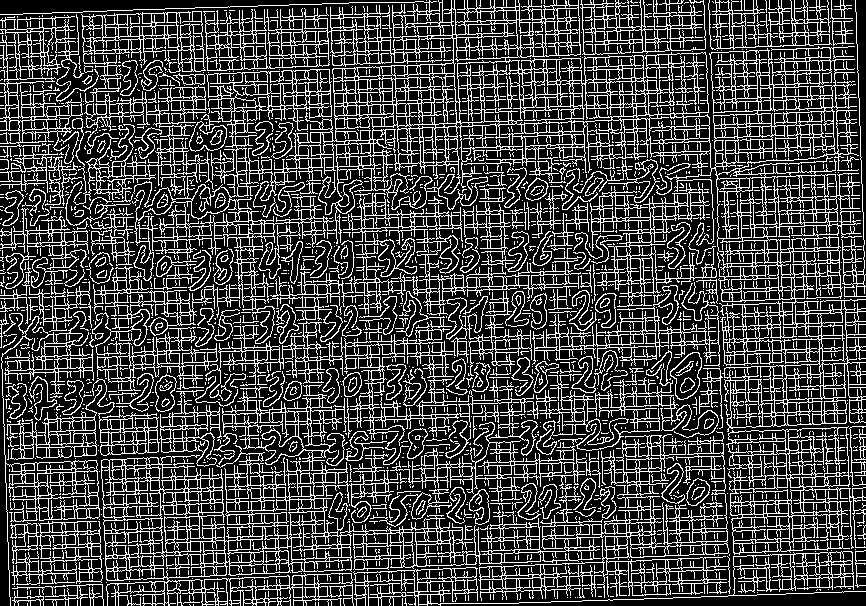

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(carte)

#img = cv2.blur(img, (2,2))

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur_img = cv2.blur(gray_img, (3,3))

#image, threshold1, threshold2(2*threshold1), apertureSize      
canny_img = cv2.Canny(blur_img,25,50,3)

cv2_imshow(canny_img)

In [ ]:
#lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

import numpy as np
import math

#image, rho, theta, threshold
lines = cv2.HoughLines(canny_img, 1, np.pi/180, 200)

img_2 = img.copy()

horizontal_lines = []
vertical_lines = []

test_angle = []

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
    pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
    if 178 < (theta*180)/np.pi < 182:
      cv2.line(img, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)
      vertical_lines.append(lines[i])
    if 89 < (theta*180)/np.pi < 91:
       test_angle.append((theta*180)/np.pi)
       horizontal_lines.append(lines[i])
       if (theta*180)/np.pi == 90.99999684048139:
        cv2.line(img_2, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)
cv2_imshow(img)
cv2_imshow(img_2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
list_elements = []
for i in range(0, len(test_angle)):
  if test_angle[i] not in list_elements:
    list_elements.append(test_angle[i])

In [ ]:
list_elements

[90.00000250447816, 89.00000133828577, 90.99999684048139]

In [ ]:
print(test_angle.count(90.00000250447816), test_angle.count(89.00000133828577), test_angle.count(90.99999684048139))

118 94 100


In [ ]:
def intersection(line1, line2):
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([[np.cos(theta1), np.sin(theta1)],
                  [np.cos(theta2), np.sin(theta2)]])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [[x0, y0]]

intersections = []

for i in range(0, len(vertical_lines)):
  for y in range(0, len(horizontal_lines)):
    intersections.append(intersection(vertical_lines[i], horizontal_lines[y]))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image = cv2.imread(carte)
output = image.copy()

plt.rcParams['figure.figsize'] =  (30, 60)
fig, ax = plt.subplots()
ax.imshow(output)

for i in range(0, len(intersections)):
  cX = intersections[i][0][0]
  cY = intersections[i][0][1]
  circle = patches.Circle((cX, cY), 1, color = 'r')
  ax.add_patch(circle)

Output hidden; open in https://colab.research.google.com to view.

kernel

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np 
import argparse



def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
 
#return thresh image with greyscale image, grey filtered image and thresh image plotted
#path: name of downloaded image, filter: minimum greyscale, w: image width, h: image height
def transform_image(path, filter, w, h):
  image = cv2.imread(path)
  image = adjust_gamma(image, 1)
  image= cv2.resize(image, (w, h))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  cv2.imwrite('gray.jpg', gray)
  img = Image.open('gray.jpg')
  pixels = img.load() # create the pixel map
  for i in range(img.size[0]): # for every pixel:
    for j in range(img.size[1]):
      if (pixels[i,j] > filter):
        pixels[i,j] = 255
  new_im = img.save("testi.jpg")
  
  testi = cv2.imread("testi.jpg")
  cv2_imshow(testi)
  img = np.array(img)
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  cv2_imshow(thresh)
  return thresh

In [ ]:
from PIL import Image

im = Image.open(carte)
width, height = im.size
print (width, height)

866 606


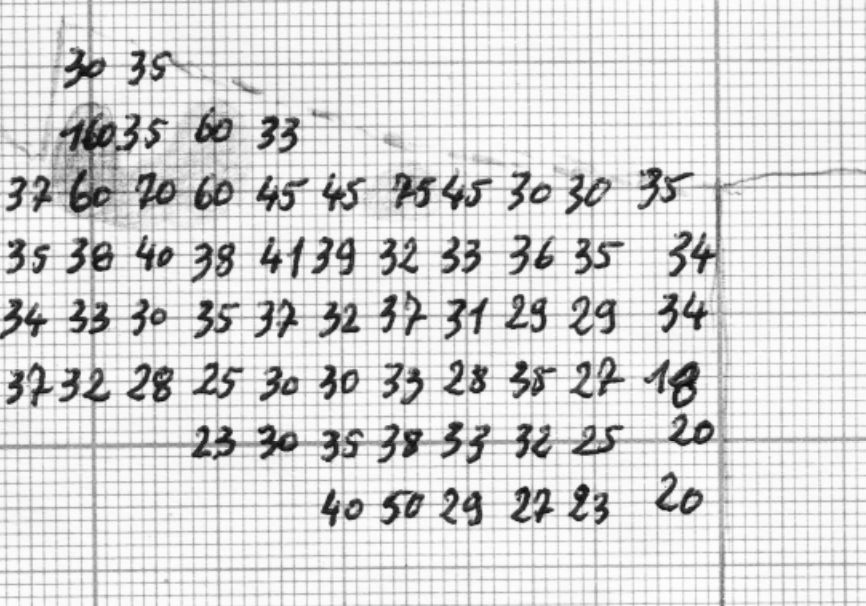

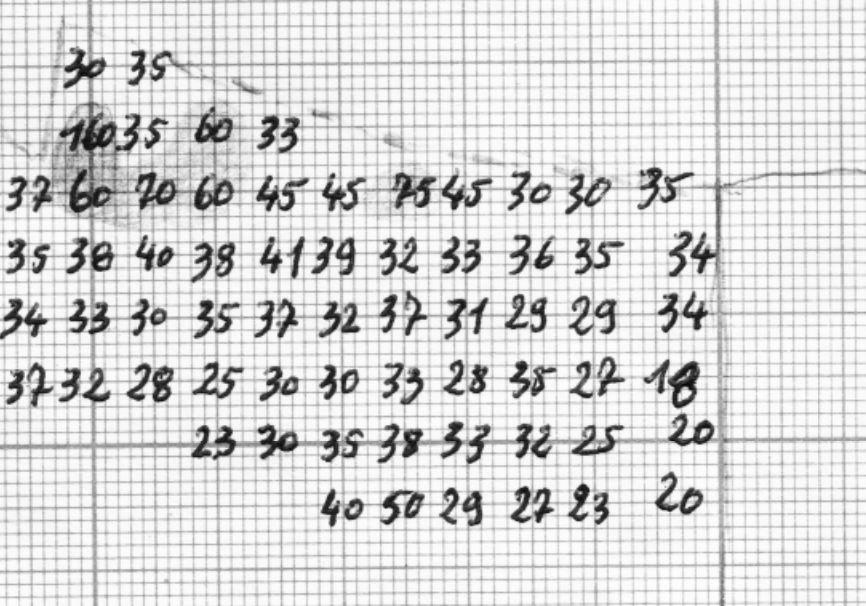

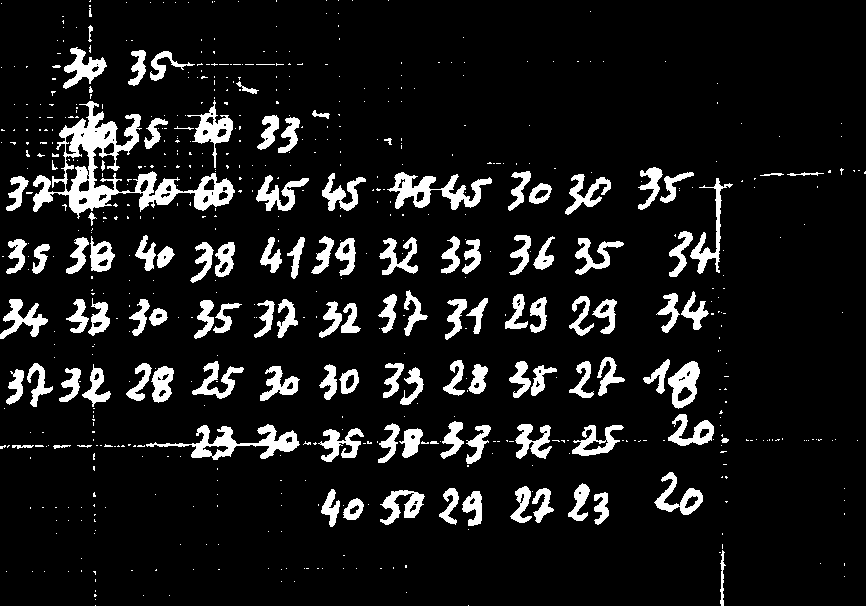

In [ ]:
thresh = transform_image(carte, 15000, width, height)

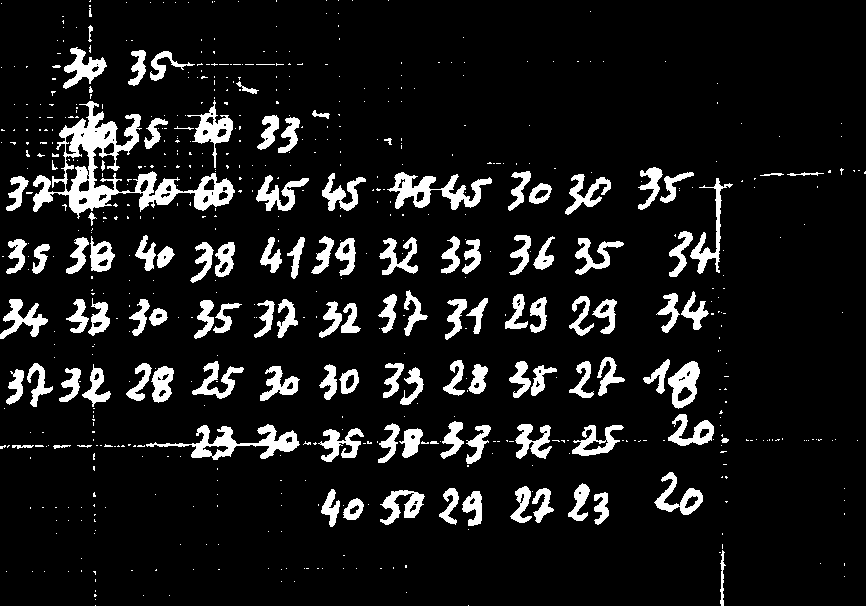

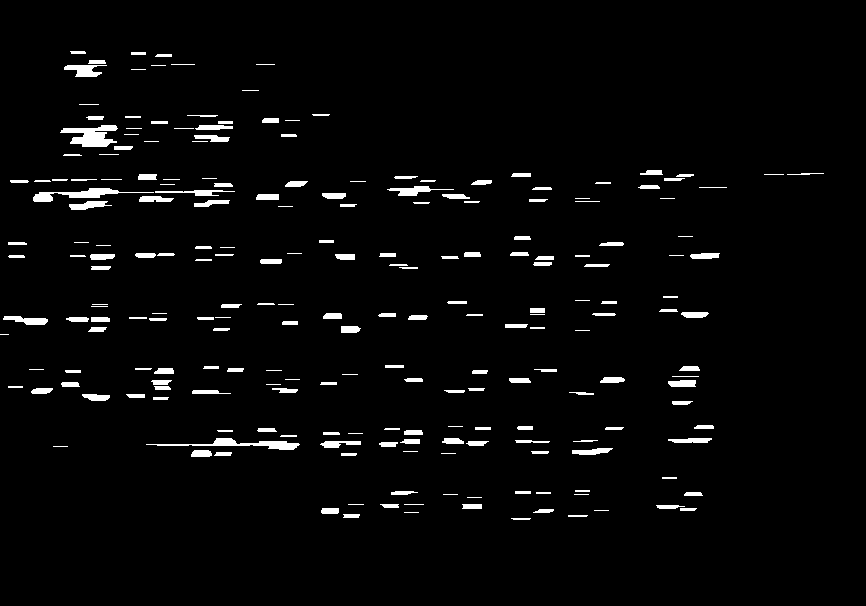

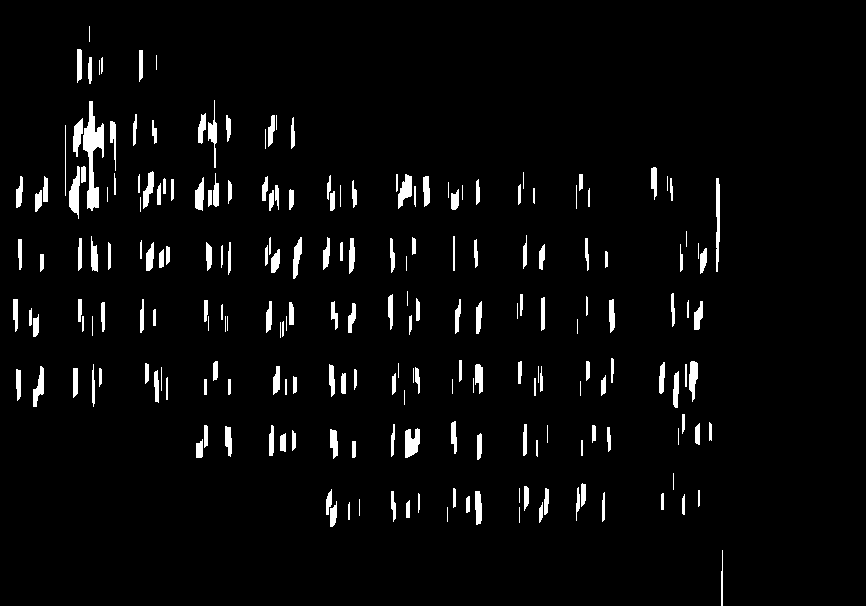

-1

In [ ]:
# Create diagonal kernel
horizontal_size = 15
vertical_size = 15
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))

# Morphological opening
mask1 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontalStructure)
mask2 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, verticalStructure)

# Outputs
cv2_imshow(thresh)
cv2_imshow(mask1)
cv2_imshow(mask2)
cv2.waitKey(0)